In [ ]:
!pip install tflite-model-maker

     |████████████████████████████████| 122kB 6.0MB/s 
     |████████████████████████████████| 344.9MB 49kB/s 
     |████████████████████████████████| 81kB 11.6MB/s 
     |████████████████████████████████| 1.1MB 49.8MB/s 
     |████████████████████████████████| 460kB 53.1MB/s 
     |████████████████████████████████| 1.0MB 49.4MB/s 
     |████████████████████████████████| 849kB 52.1MB/s 
     |████████████████████████████████| 12.2MB 47.4MB/s 
     |████████████████████████████████| 194kB 53.2MB/s 
     |████████████████████████████████| 358kB 48.5MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
     |████████████████████████████████| 174kB 48.7MB/s 
     |████████████████████████████████| 36.7MB 88kB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111007 sha256=b1c3fee595a6e0371f7a7c697c894e2186134d87e76280dd4faa7276e2009ab5
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
  Created wheel 

Import the required packages.

In [ ]:
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow_examples.lite.model_maker.core.data_util.image_dataloader import ImageClassifierDataLoader
from tensorflow_examples.lite.model_maker.core.task import image_classifier
from tensorflow_examples.lite.model_maker.core.task.model_spec import mobilenet_v2_spec
from tensorflow_examples.lite.model_maker.core.task.model_spec import ImageModelSpec
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
import os
import PIL
import matplotlib.pyplot as plt

# Get the data path


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
image_path = pathlib.Path('/content/drive/Shareddrives/file rere buryq/Semester 5/Deep Learning/Finger/data_fix/train') 
#data_dir = pathlib.Path(image_path)

#Create own model

notes: Not applicable, so skip

In [ ]:
num_classes = 5
batch_size = 32
img_height = 128
img_width = 128

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1500 files belonging to 5 classes.
Using 1200 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1500 files belonging to 5 classes.
Using 300 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['1', '2', '3', '4', '5']


In [ ]:
model4 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)       

In [ ]:
epochs=10
history = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
38/38 [==============================] - 58s 1s/step - loss: 1.7351 - accuracy: 0.2989 - val_loss: 1.2691 - val_accuracy: 0.5167
Epoch 2/10
38/38 [==============================] - 58s 1s/step - loss: 1.0021 - accuracy: 0.6477 - val_loss: 0.6556 - val_accuracy: 0.7733
Epoch 3/10
38/38 [==============================] - 58s 1s/step - loss: 0.5474 - accuracy: 0.7967 - val_loss: 0.5928 - val_accuracy: 0.7767
Epoch 4/10
38/38 [==============================] - 57s 1s/step - loss: 0.3921 - accuracy: 0.8470 - val_loss: 0.5785 - val_accuracy: 0.8033
Epoch 5/10
38/38 [==============================] - 57s 1s/step - loss: 0.2856 - accuracy: 0.9034 - val_loss: 0.6254 - val_accuracy: 0.7967
Epoch 6/10
38/38 [==============================] - 57s 1s/step - loss: 0.2295 - accuracy: 0.9111 - val_loss: 0.5642 - val_accuracy: 0.7867
Epoch 7/10
38/38 [==============================] - 57s 1s/step - loss: 0.1772 - accuracy: 0.9377 - val_loss: 0.6723 - val_accuracy: 0.7833
Epoch 8/10
38/38 [==

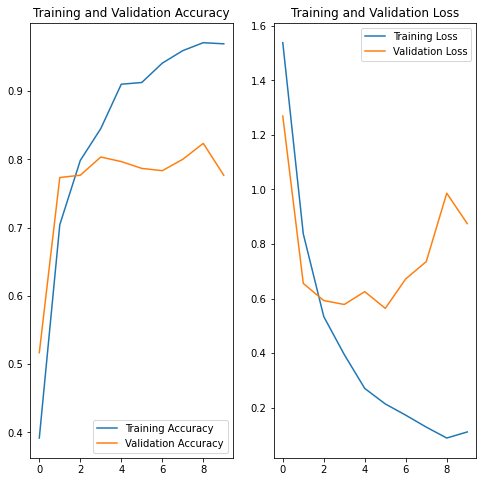

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model4.evaluate(train_ds)

38/38 [==============================] - 38s 800ms/step - loss: 0.1450 - accuracy: 0.9583


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model4)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpky1qjf55/assets


INFO:tensorflow:Assets written to: /tmp/tmpky1qjf55/assets


In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

#Create model by model maker

In [ ]:
data = ImageClassifierDataLoader.from_folder(image_path)
train_data, test_data = data.split(0.875)

INFO:tensorflow:Load image with size: 2000, num_label: 5, labels: 1, 2, 3, 4, 5.


INFO:tensorflow:Load image with size: 2000, num_label: 5, labels: 1, 2, 3, 4, 5.


In [ ]:
len(train_data)

1750

In [ ]:
len(test_data)

250

In [ ]:
model5 = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_4 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
54/54 [==============================] - 405s 7s/step - loss: 1.4369 - accuracy: 0.4368
Epoch 2/5
54/54 [==============================] - 235s 4s/step - loss: 0.8231 - accuracy: 0.8150
Epoch 3/5
54/54 [==============================] - 233s 4s/step - loss: 0.7080 - accuracy: 0.8896
Epoch 4/5
54/54 [==============================] - 232s 4s/step - loss:

In [ ]:
loss, accuracy = model5.evaluate(test_data)

8/8 [==============================] - 82s 6s/step - loss: 0.5976 - accuracy: 0.9400


#Export Model into *.tflite

In [ ]:
model5.export(export_dir='.', with_metadata=False)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/tmpdibrutk0/assets


INFO:tensorflow:Assets written to: /tmp/tmpdibrutk0/assets


INFO:tensorflow:Saving labels in ./labels.txt.


INFO:tensorflow:Saving labels in ./labels.txt.
